In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ushape.csv')

In [4]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


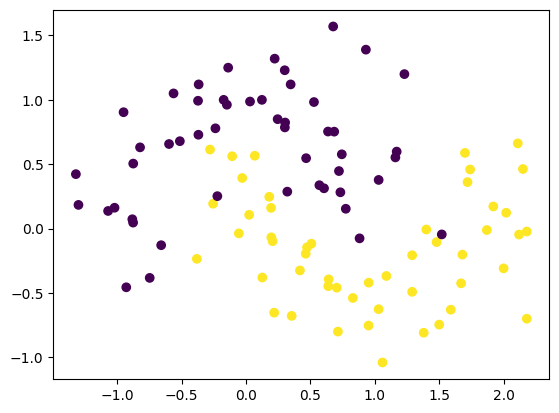

In [5]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\DC\miniconda3\envs\TF_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[ 0.7275379 , -1.9038311 ,  1.5788746 ,  0.41096714, -0.08650593,
         -1.0287504 ,  0.55908823, -2.0591748 , -0.5585502 , -1.034969  ],
        [-0.79093164, -1.7182616 ,  0.8158968 ,  0.02227228,  1.034884  ,
          0.91293526, -0.29096943,  0.46282575,  0.96100336, -0.28312138]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.00946302, -0.09952348,  0.77250004, -0.9580815 , -0.39369512,
          0.01112512,  0.3165303 , -0.0328116 ,  0.22258142, -0.34090817],
        [-0.15574963, -0.34725738,  0.07889396,  0.02762791,  0.39877343,
          0.21997312,  0.66057396, -0.48157367, -0.02340295,  0.14829318],
        [-0.09987772, -0.3300188 , -0.7069568 ,  0.02828929,  0.16746598,
          0.23231518, -0.48031458,  0.6318581 ,  0.6210022 , -0.60566676],
        [-0.09824524,  0.02380805,  0.3052008 , -0.41693458, -0.4278139 ,
         -0.37418687, -0.49637353,  0.24513847, -0.4169121 , -0.48070687],
        [ 0.39288

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-0.563332  ,  0.86717224, -0.4008558 , -0.99732244,  0.17410457,
         -0.08009747, -0.78363407, -0.85850847, -0.31429034,  0.6713575 ],
        [-1.0786294 ,  0.09978276, -0.18663605,  0.7324043 ,  0.68939704,
         -0.90185046, -0.33510303,  0.880089  ,  0.45818883,  0.139076  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.473365  ,  0.40184063, -0.3984083 , -0.21093091, -0.24220058,
          0.42504534, -0.31639427,  0.57659185, -0.21987294, -0.02543087],
        [-0.19499749, -0.32540584, -0.43415383,  0.09561583, -0.28266454,
         -0.00602893, -0.06790219, -0.69665366,  0.3427239 , -0.26338205],
        [-0.5657883 , -0.5978934 , -0.31412762,  0.17217323, -0.19315791,
         -0.26244426, -0.09540995, -0.03449018,  0.66570485,  0.5264336 ],
        [-0.49383068, -0.4812898 ,  0.17930633, -0.510142  ,  0.00348276,
          0.6685814 ,  0.04204724, -0.21089432,  0.5837811 , -0.13656014],
        [ 0.49286

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5570 - loss: 0.6883 - val_accuracy: 0.7500 - val_loss: 0.6754
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6086 - loss: 0.6856 - val_accuracy: 0.7500 - val_loss: 0.6713
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6367 - loss: 0.6840 - val_accuracy: 0.8000 - val_loss: 0.6675
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6586 - loss: 0.6800 - val_accuracy: 0.8000 - val_loss: 0.6639
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6969 - loss: 0.6782 - val_accuracy: 0.8000 - val_loss: 0.6606
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7016 - loss: 0.6769 - val_accuracy: 0.8500 - val_loss: 0.6573
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6703 - loss: 0.6775 - val_accuracy: 0.8500 - val_loss: 0.6539
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7172 - loss: 0.6727 - val_accuracy: 0.8500 - val_loss:

In [16]:
model.get_weights()

[array([[-0.50153726,  1.0601865 , -0.60490835, -0.9932256 ,  0.19417308,
          0.20395173, -0.8938711 , -0.7760004 , -0.15299502,  0.7302828 ],
        [-1.1973438 ,  0.27883902, -0.22704652,  0.9201644 ,  0.7128074 ,
         -1.1079557 , -0.25934076,  1.056858  ,  0.56035346, -0.1360813 ]],
       dtype=float32),
 array([ 0.15147233,  0.04866988, -0.02925926, -0.01968534,  0.10733642,
         0.2703538 ,  0.21877156, -0.03248931,  0.08973383, -0.11401722],
       dtype=float32),
 array([[ 0.42542252,  0.39006984, -0.3984083 , -0.02669792, -0.24220058,
          0.4943792 , -0.28283966,  0.60823005, -0.12435465,  0.12837842],
        [-0.27239722, -0.33569774, -0.43415383,  0.296266  , -0.28266454,
          0.1415686 , -0.1918264 , -0.48038167,  0.32023576, -0.24561074],
        [-0.6446374 , -0.6109594 , -0.31412762,  0.12140391, -0.20515467,
         -0.08431043, -0.14858602, -0.12754624,  0.8201946 ,  0.7233663 ],
        [-0.5638828 , -0.4812898 ,  0.17930633, -0.6752232 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 574us/step


<Axes: >

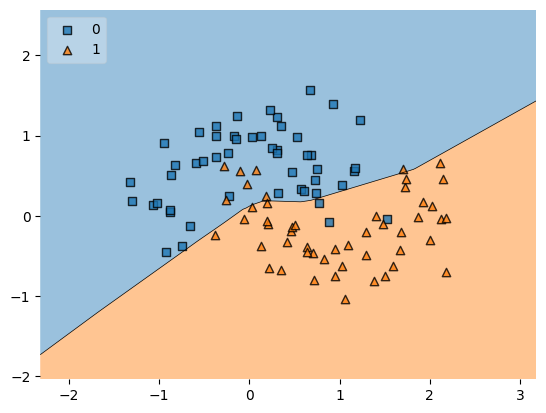

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [18]:
(np.random.randn(10,10)*0.01).min()

-0.030130857849516104

In [19]:
(np.random.randn(10,10)*0.01).max()

0.028596331785293617